In [1]:
from google.cloud import bigquery
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import plotly as px

In [2]:
# Configuración del cliente de BigQuery
client = bigquery.Client()

# Definición de la consulta SQL
query = """
    SELECT * FROM `vanti-poc-440213.data_poc.raw_customers`
"""

# Ejecuta la consulta y guarda los resultados en un DataFrame
try:
    customers = client.query(query).to_dataframe()
    print("Consulta ejecutada exitosamente. Aquí tienes las primeras filas:")
    print(df.head())
except Exception as e:
    print(f"Error al ejecutar la consulta: {e}")

c:\Users\danielpiamba\.conda\envs\CristoEnv\lib\site-packages\google\cloud\bigquery\table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


Consulta ejecutada exitosamente. Aquí tienes las primeras filas:
Error al ejecutar la consulta: name 'df' is not defined


In [3]:
customers

,int64_field_0,IdCustomer,Customer,Address,Telephone,Nit,Service,State,IdCompany,ContactNamePayment,...,Documents,Observation,NDays,CreateDate,UpgradeDate,UserCreate,UserUpdate,CalendarRate,Periodicity,IdCountry
0,8,1107,TALENTO & CULTURA PERIFERIA,Ak 19 No. 95- 12/20,6000080,900310011-9,Selección de personal,0,2,X,...,x,XX,x,2021-02-25,NaT,psyuly1986@gmail.com,None,0,0.0,1
1,9,1106,TALENTO & CULTURA CBIT,Ak 19 No. 95- 12/20,6000080,900.087.315-3,Selección de personal,0,2,X,...,x,x,x,2021-02-25,NaT,psyuly1986@gmail.com,None,0,0.0,1
2,74,1117,FABRICA PORVENIR,Ak 19 No. 95- 12/20,6000080,900.087.315-3,Fabrica para Porvenir,1,2,X,...,x,x,x,2021-03-04,NaT,psyuly1986@gmail.com,None,0,3.0,1
3,79,1115,FABRICA BANCO POPULAR,Ak 19 No. 95- 12/20,6000080,900.087.315-3,Servicios de fabrica Banco Popular,1,2,X,...,x,x,x,2021-03-04,NaT,psyuly1986@gmail.com,None,0,3.0,1
4,80,1113,FABRICA BANCO DE OCCIDENTE,Ak 19 No. 95- 12/20,6000080,900.087.315-3,Fabrica para Banco de occidente,1,2,X,...,x,x,x,2021-03-04,NaT,psyuly1986@gmail.com,None,0,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,139,69,BANCO COLPATRIA MULTIBANCA COLPATRIA S.A.,"Cra. 7 #24-51, Bogotá",7456300,860034594,"IT Staffing, Fabrica",1,1,ALEJANDRO SOTOMAYOR,...,na,na,45,2017-06-12,2024-02-05,carolina.alvarez@periferiaitgroup.com,mila.a.per@gmail.com,1,3.0,1
155,47,1097,LIBERTY SEGUROS SA,Calle 72 #10-07,7057050,860039988,SEGUROS,1,1,FREDY FONSECA,...,Contrato,.,30 dias,2019-09-30,2021-07-16,nathalie.barrios@periferiaitgroup.com,nathalie.barrios@periferiaitgroup.com,1,2.0,1
156,64,1126,FUNDACION SANTA FE DE BOGOTÁ,Calle 119 #7-75 -Piso 2,6030303,860037950,Nearshore,1,2,OSCAR GOMEZ,...,ninguna,None,60,2021-09-10,2021-09-10,nathalie.barrios@periferiaitgroup.com,andresleonqu@gmail.com,1,3.0,1
157,119,1090,BYTTE,Calle 26 #69 D-91 Torre 1 Of 407,7443800,830115764-4,CONSULTORIA,1,2,Paola Pardo,...,Contrato,CONTRATO,30 días,2019-06-20,2019-06-20,nathalie.barrios@periferiaitgroup.com,nathalie.barrios@periferiaitgroup.com,1,3.0,1


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Cargar el conjunto de datos de California Housing
california = fetch_california_housing()
data = pd.DataFrame(data=california.data, columns=california.feature_names)
data['MEDV'] = california.target  # Añadir la variable objetivo (precio medio)

# Visualizar los primeros registros del conjunto de datos
print(data.head())


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude   MEDV  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  


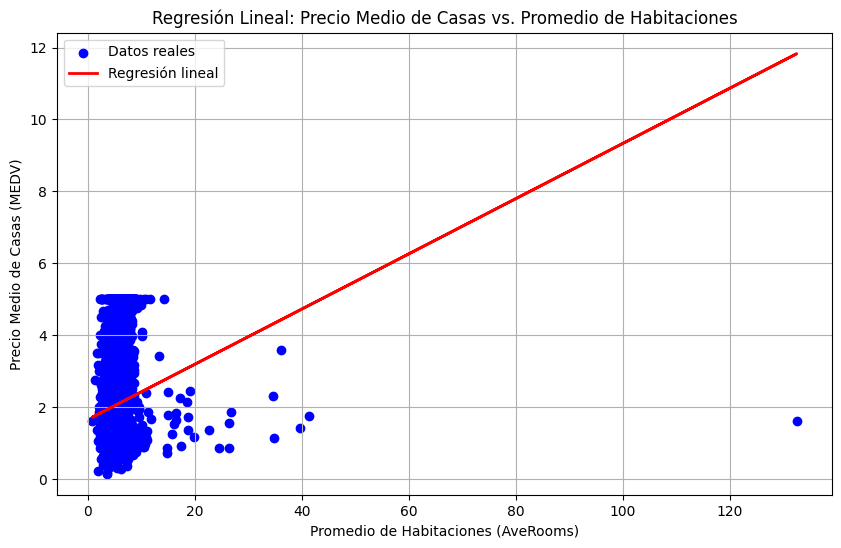

In [7]:

# Seleccionar una característica para la regresión; aquí usamos 'AveRooms' (promedio de habitaciones)
X = data[['AveRooms']]  # Cambia la característica según sea necesario
y = data['MEDV']

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Datos reales')  # Puntos reales
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regresión lineal')  # Línea de regresión
plt.title('Regresión Lineal: Precio Medio de Casas vs. Promedio de Habitaciones')
plt.xlabel('Promedio de Habitaciones (AveRooms)')
plt.ylabel('Precio Medio de Casas (MEDV)')
plt.legend()
plt.grid()
plt.show()




   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

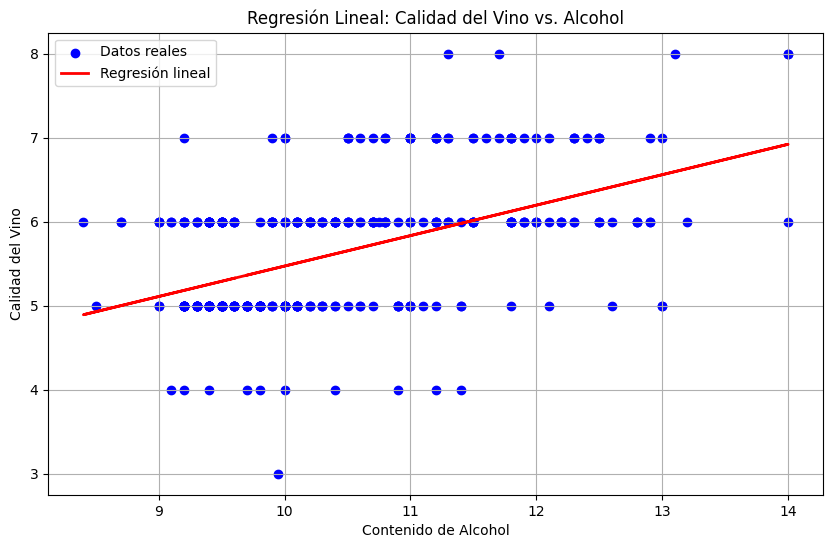

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Cargar el conjunto de datos de Wine Quality (ajusta la ruta según sea necesario)
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = pd.read_csv(url, sep=';')

# Visualizar los primeros registros del conjunto de datos
print(data.head())

# Seleccionar características (X) y variable objetivo (y)
# Aquí usamos 'alcohol' como característica para predecir 'quality'
X = data[['alcohol']]  # Cambia la característica según sea necesario
y = data['quality']

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Datos reales')  # Puntos reales
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regresión lineal')  # Línea de regresión
plt.title('Regresión Lineal: Calidad del Vino vs. Alcohol')
plt.xlabel('Contenido de Alcohol')
plt.ylabel('Calidad del Vino')
plt.legend()
plt.grid()
plt.show()


In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
 
# Cargar datos desde BigQuery o cualquier otra fuente
datos = pd.read_csv('ruta/a/tus/datos.csv')
 
# Dividir los datos en características (X) y objetivo (y)
X = datos[['caracteristica1', 'caracteristica2']]
y = datos['objetivo']
 
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
 
# Crear y entrenar el modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X_train, y_train)
 
# Realizar predicciones
predicciones = modelo.predict(X_test)
 
# Evaluar el modelo
mse = mean_squared_error(y_test, predicciones)
print(f'Error cuadrático medio: {mse}')

FileNotFoundError: [Errno 2] No such file or directory: 'ruta/a/tus/datos.csv'

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from google.cloud import bigquery
from google.oauth2 import service_account
 
# Ruta a tus credenciales JSON
ruta_credenciales = r'c:\Users\danielpiamba\Downloads\vanti-poc-440213-e5ddc44ddc21.json'
credentials = service_account.Credentials.from_service_account_file(ruta_credenciales)
client = bigquery.Client(credentials=credentials, project='vanti-poc-440213')
 
# Definición de la consulta SQL
query = """
    SELECT fecha, valor
    FROM `vanti-poc-440213.data_poc.raw_customers`
    WHERE fecha IS NOT NULL AND valor IS NOT NULL
"""
 
# Ejecuta la consulta y guarda los resultados en un DataFrame
df = client.query(query).to_dataframe()
 
# Asegúrate de que la columna 'fecha' esté en el formato datetime
df['fecha'] = pd.to_datetime(df['fecha'])
 
# Ordenar los datos por fecha
df = df.sort_values('fecha')
 
# Separar las características (X) y la variable objetivo (y)
X = np.array((df['fecha'] - df['fecha'].min()).dt.days).reshape(-1, 1)  # Usar días como característica
y = df['valor'].values
 
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
 
# Crear y entrenar el modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X_train, y_train)
 
# Realizar predicciones
predicciones = modelo.predict(X_test)
 
# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.scatter(df['fecha'], df['valor'], color='blue', label='Datos Reales')
plt.plot(df['fecha'], modelo.predict(X), color='red', linewidth=2, label='Regresión Lineal')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.title('Regresión Lineal por Tiempos')
plt.legend()
plt.grid(True)
plt.show()

BadRequest: 400 Unrecognized name: fecha at [4:11]; reason: invalidQuery, location: query, message: Unrecognized name: fecha at [4:11]

Location: US
Job ID: a6e9fd9c-151a-4feb-b04e-7730a4066765


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet

# Generar datos sintéticos
np.random.seed(42)
n_years = 5
n_days = n_years * 365
date_range = pd.date_range(start='2018-01-01', periods=n_days, freq='D')

# Generar datos con tendencia y estacionalidad
trend = np.linspace(100, 200, n_days)  # Tendencia lineal
seasonality = 30 * np.sin(np.linspace(0, 3 * np.pi, n_days))  # Componente estacional
noise = np.random.normal(0, 5, n_days)  # Ruido aleatorio

# Consumo simulado
consumo = trend + seasonality + noise

# Crear DataFrame
data = pd.DataFrame({'ds': date_range, 'y': consumo})

# Visualizar los datos
plt.figure(figsize=(12, 6))
plt.plot(data['ds'], data['y'], label='Consumo Simulado', color='blue')
plt.title('Consumo Simulado de Electricidad')
plt.xlabel('Fecha')
plt.ylabel('Consumo')
plt.legend()
plt.show()

# Ajustar el modelo Prophet
model = Prophet(interval_width=0.95)  # Intervalos de confianza al 95%
model.fit(data)

# Hacer predicciones
future = model.make_future_dataframe(periods=365)  # Predice un año hacia el futuro
forecast = model.predict(future)

# Visualizar resultados con intervalos de confianza
fig = model.plot(forecast)
plt.title("Predicción de Consumo de Electricidad con Intervalos de Confianza")
plt.xlabel("Fecha")
plt.ylabel("Consumo")
plt.axhline(y=forecast['yhat'].mean(), color='red', linestyle='--', label='Media Predicha')
plt.legend()
plt.show()

# Visualizar componentes
model.plot_components(forecast)


ModuleNotFoundError: No module named 'fbprophet'

In [13]:
!pip install fbprophet

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 0.0/5.8 MB ? eta -:--:--
     ------------------------------ --------- 4.5/5.8 MB 22.3 MB/s eta 0:00:01
     ---------------------------------------- 5.8/5.8 MB 20.6 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
INFO: pip is looking at multiple versions of pystan to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of pystan to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
     ----------------------------

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [6 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "C:\Users\danielpiamba\AppData\Local\Temp\pip-install-tasg6ffs\pystan_c284b2b9cdca48b29a68ab853959af4d\setup.py", line 122, in <module>
          from Cython.Build.Inline import _get_build_extension
      ModuleNotFoundError: No module named 'Cython'
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
